# 🚚 Food Order Cost and Profit Analysis Dataset Overview

Food Delivery Cost and Profitability Analysis is a comprehensive evaluation aimed at **understanding and optimizing the financial dynamic** of a food delivery operation. The goal is to **identify areas** where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability. Below is a quick summary:

- **🔢 Number of Records**: 1,000
- **🧩 Total Features**: 12 (mix of Categorical and Continuous types)

### 📝 Feature Descriptions:

| Column                               | Description                                   | Data Type  |
|--------------------------------------|-----------------------------------------------|------------|
| 📦 **Order ID**                     | Unique order identifier                       | Integer     |
| 🧑‍💼 **Customer ID**                  | Unique customer identifier                    | Object      |
| 🍽️ **Restaurant ID:**               | Unique restaurant identifier                  | Object      |
| 🕒 **Order Date and Time**          | Order timestamp                               | Object      |
| 🛵 **Delivery Date and Time**       | Delivery timestamp                            | Object      |
| 💰 **Order Value**                  | Order cost                                    | Integer     |
| 💸 **Delivery Fee**                 | Delivery service charge                       | Integer     |
| 💳 **Payment Method**               | Method of customer payment                    | Object      |
| 🎁 **Discounts and Offers**         | Applied discounts or promotions               | Object      |
| 📊 **Commission Fee**               | Platform commission charge                    | Integer     |
| 🏦 **Payment Processing Fee:**      | Payment handling fee                          | Integer     |
| 🔄 **Refunds/Chargebacks**          | Returned or disputed payments                 | Integer     |

# <span style="color:transparent;">1. Imports and Setup</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">1. Imports and Setup</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/food-order-cost-and-profit-analysis/food_orders_new_delhi (1).csv')

# <span style="color:transparent;">2. Data Understanding and Preparation</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">2. Data Understanding and Preparation</h1>
</div>

In [3]:
df.shape

(1000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
df.iloc[111:116]

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
111,112,C6977,R2208,2024-01-06 04:37:05,2024-01-06 06:28:05,1171,50,Cash on Delivery,5% on App,79,23,0
112,113,C8721,R2525,2024-01-01 07:57:05,2024-01-01 09:49:05,310,30,Digital Wallet,15% New User,71,38,0
113,114,C8035,R2520,2024-02-02 19:05:52,2024-02-02 19:37:52,954,20,Credit Card,15% New User,52,10,0
114,115,C2484,R2551,2024-02-06 19:56:55,2024-02-06 21:38:55,750,50,Digital Wallet,10%,150,13,0
115,116,C8858,R2961,2024-01-18 10:47:10,2024-01-18 12:05:10,1745,30,Cash on Delivery,15% New User,154,41,0


In [6]:
df.isna().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

***Converting order and delivery times to datetime format for further analysis:***

In [7]:
df[['Order Date and Time', 'Delivery Date and Time']] = df[['Order Date and Time', 'Delivery Date and Time']].apply(pd.to_datetime)

***Adding a column with the day of the week:***

In [8]:
df['Day of Week'] = pd.Categorical(
    df['Order Date and Time'].dt.day_name(),
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

orders_by_day = df['Day of Week'].value_counts()

print(f'Order volume by day of the week: {orders_by_day}')

Order volume by day of the week: Day of Week
Tuesday      172
Saturday     157
Monday       146
Wednesday    144
Thursday     133
Friday       126
Sunday       122
Name: count, dtype: int64


***Calculating the delivery time:***

In [9]:
df['Delivery Duration'] = df['Delivery Date and Time'] - df['Order Date and Time']

In [10]:
mean_duration = df['Delivery Duration'].mean().round('s')

print(f'The average delivery time is = {mean_duration}')

The average delivery time is = 0 days 01:13:34


In [11]:
df['Delivery Duration (minutes)'] = df['Delivery Duration'].dt.total_seconds() / 60

***For most services, 60 minutes is a good(also known as the 'gold') standard for preparation and delivery. We'll add a new boolean column: 1 if delivery was within an hour, 0 if it exceeded:***

In [12]:
df['Normal Delivery Duration'] = df['Delivery Duration'].apply(lambda x: 1 if datetime.timedelta(minutes=0) <= x <= datetime.timedelta(minutes=60) else 0)

In [13]:
percentage = (df[df['Normal Delivery Duration'] == 1].shape[0] / df.shape[0]) * 100
print(f'Percentage of deliveries meeting the "Gold standard" (within 1 hour) = {percentage:.1f}%')

Percentage of deliveries meeting the "Gold standard" (within 1 hour) = 36.6%


In [14]:
def cat_time(time):
    '''Determine the time of day based on the given time.'''
    time = time.time()
    if datetime.time(23, 0) <= time or time < datetime.time(7, 0):
        return 'Night'
    elif datetime.time(7, 0) <= time < datetime.time(12, 0):
        return 'Morning'
    elif datetime.time(12, 0) <= time < datetime.time(17, 0):
        return 'Afternoon'
    elif datetime.time(17, 0) <= time < datetime.time(23, 0):
        return 'Evening'

In [15]:
df['Order time period'] = df['Order Date and Time'].apply(cat_time)
df['Order time period'] = pd.Categorical(df['Order time period'])

new_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df['Order time period'] = pd.Categorical(df['Order time period'], categories=new_order, ordered=True)

In [16]:
df['Order time period'].groupby(df['Order time period']).count()

Order time period
Morning      219
Afternoon    188
Evening      253
Night        340
Name: Order time period, dtype: int64

***Using regular expressions to convert the discount column into a float format for easier calculations:***

In [17]:
import re

def extract_discount(value):
    if pd.isna(value): 
        return 0
    
    percentage_match = re.search(r'(\d+)%', str(value))
    if percentage_match:
        return float(percentage_match.group(1)) / 100 
    
    fixed_match = re.search(r'(\d+)\s*off', str(value), re.IGNORECASE)
    if fixed_match:
        return float(fixed_match.group(1)) 
    
    else:
        return 0

df['Discount Value'] = df['Discounts and Offers'].apply(extract_discount)

In [18]:
df['Discount Value'] = df['Discount Value'].apply(lambda x: 0.5 if x == 50 else x)

In [19]:
df['Discount Value'].unique()

array([0.05, 0.1 , 0.15, 0.  , 0.5 ])

***Calculating the total customer payment, accounting for delivery fees, discounts/promotions, and any refunds issued for various reasons:***

In [20]:
df['Total Customer Payment'] = (df['Order Value'] + df['Delivery Fee'] - df['Discount Value'] * df['Order Value'] - df['Refunds/Chargebacks']).round(0).astype(int)

In [21]:
df['Payment Method'] = pd.Categorical(df['Payment Method'])

***Introducing a new column: 1 for weekdays, 0 for weekends:***

In [22]:
df['Workday'] = np.where(df['Day of Week'].isin(['Monday', 'Tuesday', 'Wednedsay', 'Thursday', 'Friday']), 1, 0)

In [23]:
df['Delivery Duration (minutes)'] = df['Delivery Duration'].dt.total_seconds() / 60

***Anomaly Detection:***

In [24]:
mean_for_total = df['Total Customer Payment'].mean()
std_for_total = df['Total Customer Payment'].std()
std_treshold_bottom = mean_for_total - std_for_total * 2.5 
std_treshold_top = mean_for_total + std_for_total * 2.5 
print(f'Lower threshold = {std_treshold_bottom:.2f}; Upper threshold = {std_treshold_top:.2f}')
print(f'Number of outliers = {df[df["Total Customer Payment"] > std_treshold_top].shape[0]}')
print(f'Number of normal values = {df[df["Total Customer Payment"] <= std_treshold_top].shape[0]}')

Lower threshold = -353.74; Upper threshold = 2113.77
Number of outliers = 0
Number of normal values = 1000


# <span style="color:transparent;">3. Data Visualization and Insights</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">3. Data Visualization and Insights</h1>
</div>

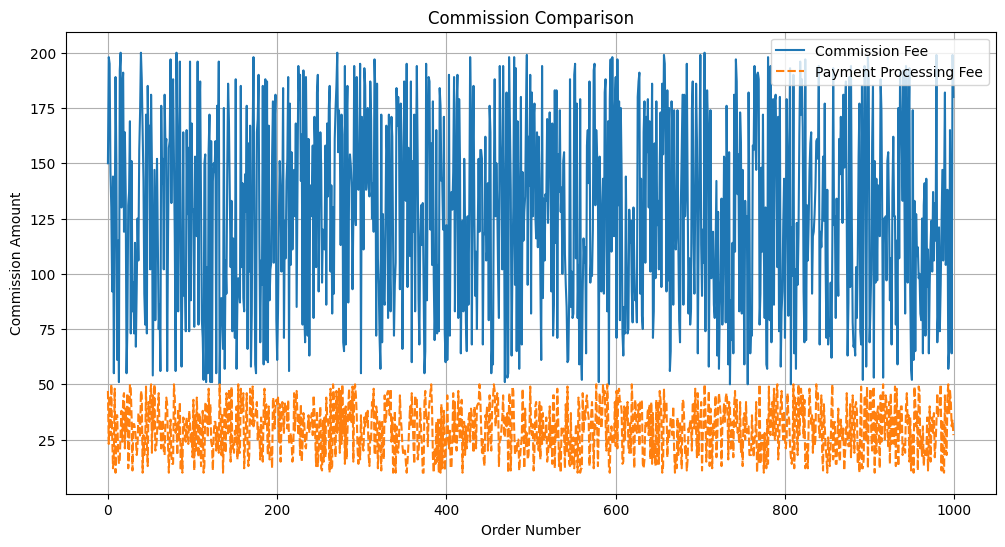

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[['Commission Fee', 'Payment Processing Fee']])
plt.title('Commission Comparison')
plt.xlabel('Order Number')
plt.ylabel('Commission Amount')
plt.grid(True)

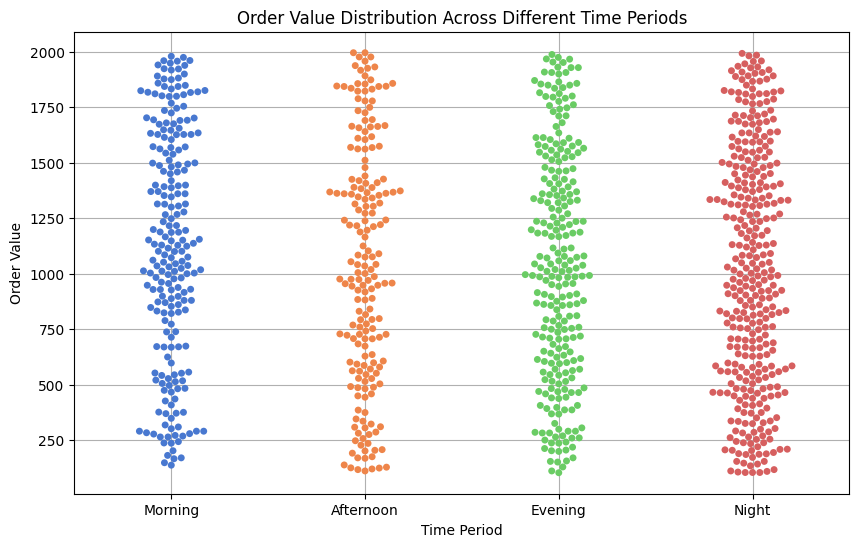

In [26]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Order time period', y='Order Value', data=df, palette='muted')
plt.title('Order Value Distribution Across Different Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Order Value')
plt.grid(True)

Text(0.5, 1.0, 'Order Value Distribution by Payment Method')

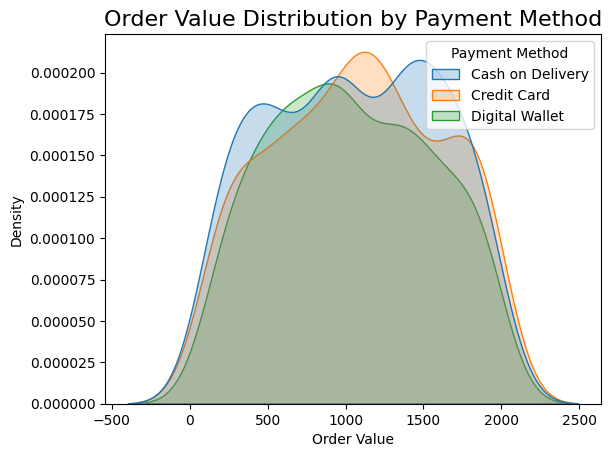

In [27]:
sns.kdeplot(data=df, x='Order Value', hue='Payment Method', fill=True)
plt.title("Order Value Distribution by Payment Method", fontsize=16)

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Key Observations:</h3>
  <ul>
    <li><strong>Cash on Delivery Shows a Bimodal Distribution:</strong>
      <br>There are peaks around 900 and 1600, indicating two distinct groups of customers: those placing lower-value and higher-value orders.</li>
    <li><strong>Credit Card Payments Are Linked to Higher-Value Orders:</strong>
      <br>There is a single peak around 1000–1100, suggesting customers using cards tend to spend more.</li>
    <li><strong>Digital Wallet and Cash on Delivery Orders Share Similar Patterns for Lower-Value Purchases:</strong>
      <br>Both methods show peaks around 900, suggesting comparable spending behavior for lower-priced orders.</li>
  </ul>
</div>


Text(0.5, 1.0, 'Distribution of Discount Amounts')

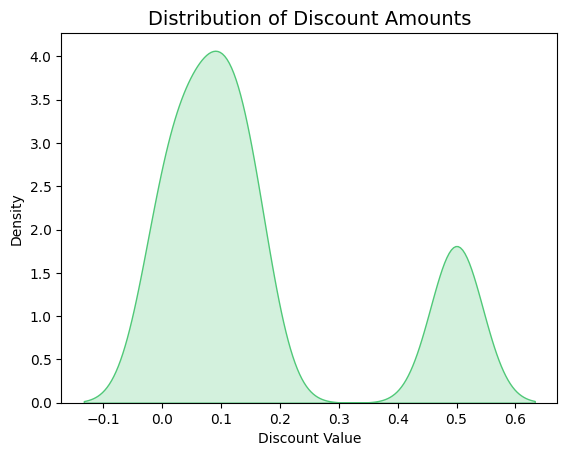

In [28]:
sns.kdeplot(data=df['Discount Value'], fill=True, color='#50c878')
plt.title("Distribution of Discount Amounts", fontsize=14)

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Key Insights from the Graph:</h3>
  <ul>
    <li><strong>Most Common Discounts:</strong>
      <br>The majority of discounts are around 10%, indicating that small discounts are typical.</li>
    <li><strong>Secondary Peak:</strong>
      <br>There is a smaller peak near 50%, suggesting occasional large discounts or promotions.</li>
    <li><strong>Distribution Shape:</strong>
      <br>The distribution is bimodal, with two main clusters: one for small discounts and another for larger ones.</li>
    <li><strong>Rare High Discounts:</strong>
      <br>Discounts greater than 20% are less common but present.</li>
  </ul>
</div>


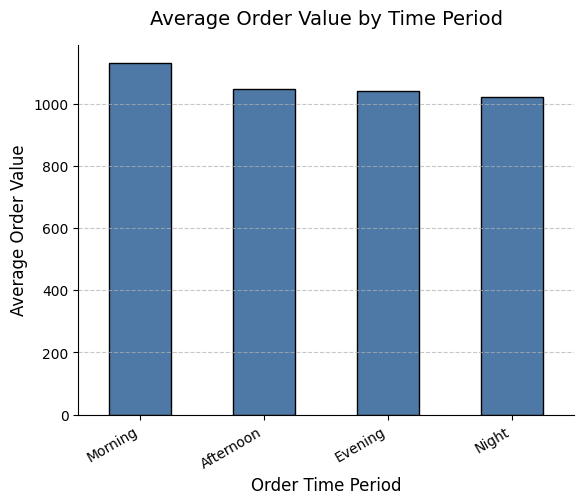

In [29]:
df.groupby('Order time period', observed=True)['Order Value'].mean().plot(kind='bar', color='#4e79a7', edgecolor='black')

plt.xticks(rotation=30, ha='right') 
plt.title('Average Order Value by Time Period', fontsize=14, pad=15)
plt.xlabel('Order Time Period', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.gca().spines[['top', 'right']].set_visible(False)

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Key Observation:</h3>
  <ul>
    <li><strong>No Notable Difference in Average Order Value Across Time Periods:</strong>
      <br>There is no significant difference in the average order value across different time periods, indicating that the order amounts remain relatively stable over time.</li>
  </ul>
</div>


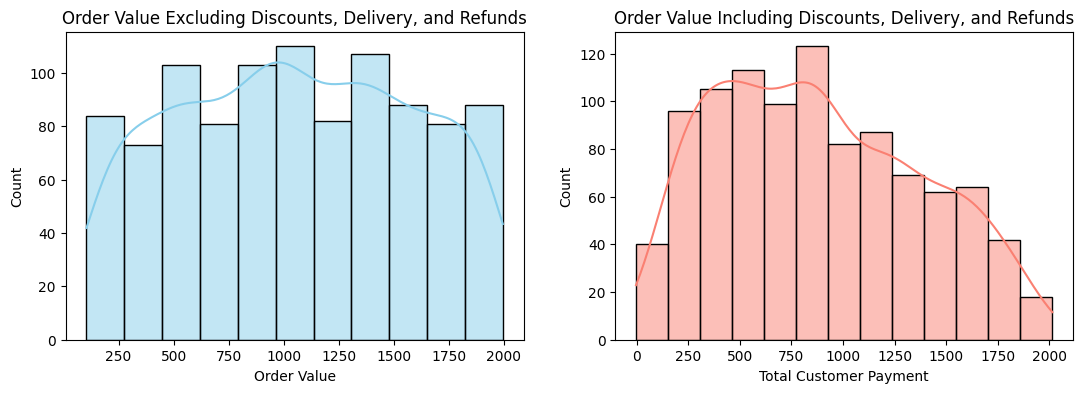

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
sns.histplot(df['Order Value'], ax=ax[0], kde=True, legend=False, color='skyblue', edgecolor='black')
ax[0].set_title("Order Value Excluding Discounts, Delivery, and Refunds")
sns.histplot(df['Total Customer Payment'], ax=ax[1], kde=True, legend=False, color='salmon', edgecolor='black')
ax[1].set_title("Order Value Including Discounts, Delivery, and Refunds")
plt.show()

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Key Observations:</h3>
  <ul>
    <li><strong>Significant Impact of Discounts on the Final Order Value:</strong>
      <br>The final customer payment amount is significantly lower than the initial order value due to discounts and refunds.</li>
    <li><strong>Increased Variability in Final Customer Payments:</strong>
      <br>Discounts and additional charges introduce more variability in final payment amounts compared to the initial order values.</li>
    <li><strong>Change in Distribution Patterns:</strong>
      <br>The initial orders are evenly distributed across different price categories, but after applying discounts and additional charges, more orders fall into the lower price segment.</li>
  </ul>
</div>


In [31]:
mean_duration_by_period = df.groupby(df['Order time period'], observed=False)['Delivery Duration (minutes)'].mean()
mean_duration_by_period.round()

Order time period
Morning      72.0
Afternoon    77.0
Evening      73.0
Night        73.0
Name: Delivery Duration (minutes), dtype: float64

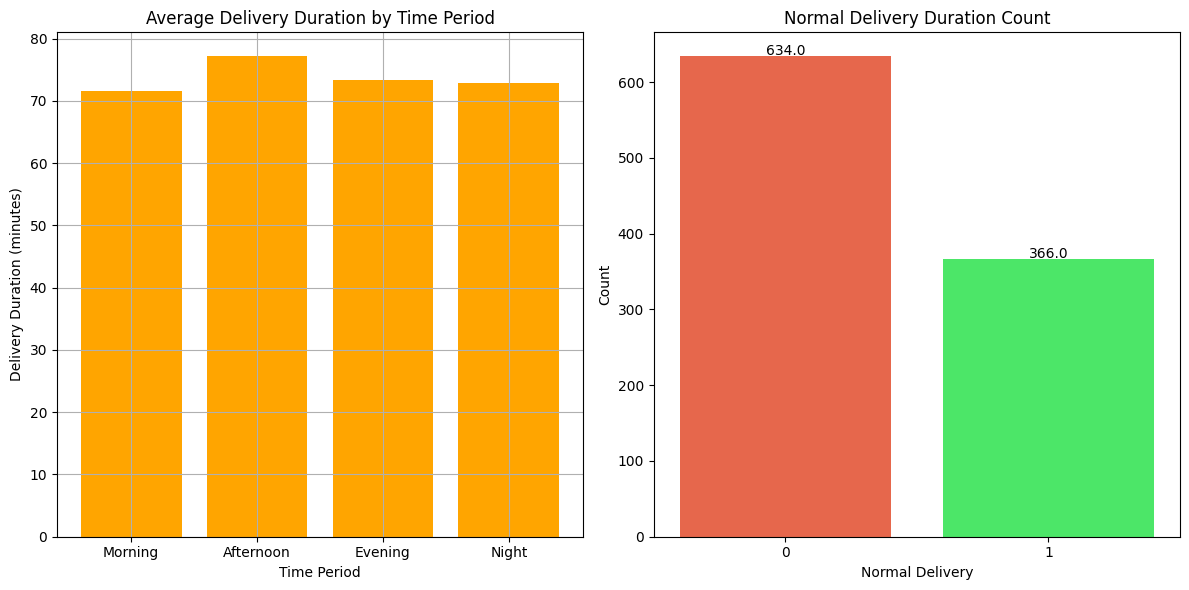

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(mean_duration_by_period.index, mean_duration_by_period, color='orange')
ax1.set_title('Average Delivery Duration by Time Period')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Delivery Duration (minutes)')
ax1.grid(True)

colors = ['#FF5733', '#33FF57']
sns.barplot(x=df['Normal Delivery Duration'].value_counts().index, 
            y=df['Normal Delivery Duration'].value_counts(), 
            palette=colors, ax=ax2)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height() + 2), 
                 ha='center', va='baseline', fontsize=10, color='black')

ax2.set_title('Normal Delivery Duration Count')
ax2.set_xlabel('Normal Delivery')
ax2.set_ylabel('Count')

plt.tight_layout()

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <ul>
    <li><strong>The average delivery time in the <u>morning, evening, and night periods</u></strong> (72, 73, and 73 minutes, respectively) is quite similar, indicating stable delivery times during these intervals.</li>
    <li><strong>The <u>afternoon period</u></strong> has a slightly higher average delivery time (77 minutes), which may suggest delays caused by higher order volume, traffic, or other factors.</li>
    <li><strong>It's important to note that <u>two-thirds of the orders</u></strong> take longer than 60 minutes to be delivered.</li>
  </ul>
</div>


In [33]:
total_value_period = pd.DataFrame(df.groupby('Order time period', observed=True)['Order Value'].sum()) 
total_value_period

,Order Value
Order time period,
Morning,247701
Afternoon,196601
Evening,263025
Night,346642


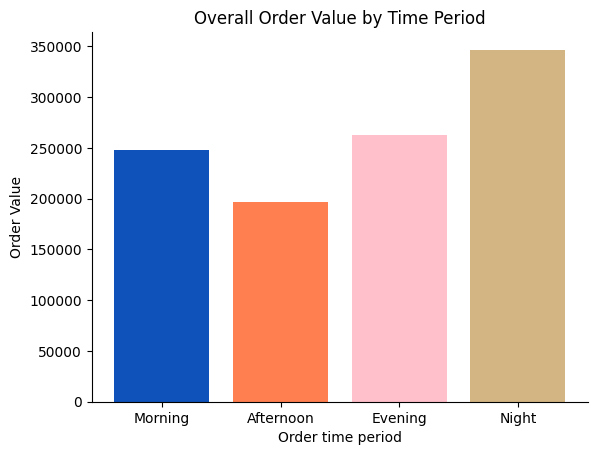

In [34]:
colors = ['#0F52BA', '#FF7F50', '#FFC0CB', '#D3B583']
plt.bar(total_value_period.index, total_value_period['Order Value'], color=colors[:len(total_value_period)])
plt.title('Overall Order Value by Time Period')
plt.xlabel('Order time period')
plt.ylabel('Order Value')

plt.gca().spines[['top', 'right']].set_visible(False)

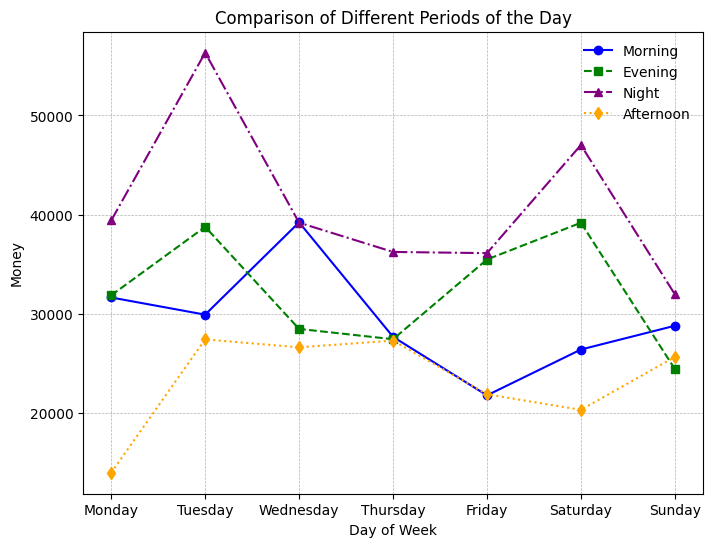

In [35]:
day_by_period = df.groupby(['Order time period', 'Day of Week'], observed=False)['Total Customer Payment'].sum()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(day_by_period.loc['Morning'], label='Morning', linestyle='-', marker='o', color='blue')
ax.plot(day_by_period.loc['Evening'], label='Evening', linestyle='--', marker='s', color='green')
ax.plot(day_by_period.loc['Night'], label='Night', linestyle='-.', marker='^', color='purple')
ax.plot(day_by_period.loc['Afternoon'], label='Afternoon', linestyle=':', marker='d', color='orange')

ax.set_title('Comparison of Different Periods of the Day')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Money')
ax.legend(frameon=False, loc='best')
ax.grid(True, linestyle='--', linewidth=0.5)
plt.show()

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Observations:</h3>
  <ul>
    <li><strong>Night orders</strong> (purple line) generate the highest revenue, especially on Tuesday and Saturday.</li>
    <li><strong>Morning orders</strong> (blue line) remain relatively stable throughout the week but bring in less revenue compared to night orders.</li>
    <li><strong>Afternoon orders</strong> (orange line) generate the lowest revenue, particularly at the beginning of the week.</li>
    <li><strong>Evening orders</strong> (green line) show fluctuations, with peaks on Tuesday and Saturday.</li>
  </ul>
</div>


Text(0.5, 0.98, 'Weekly Spending Patterns: Mean Amount Spent')

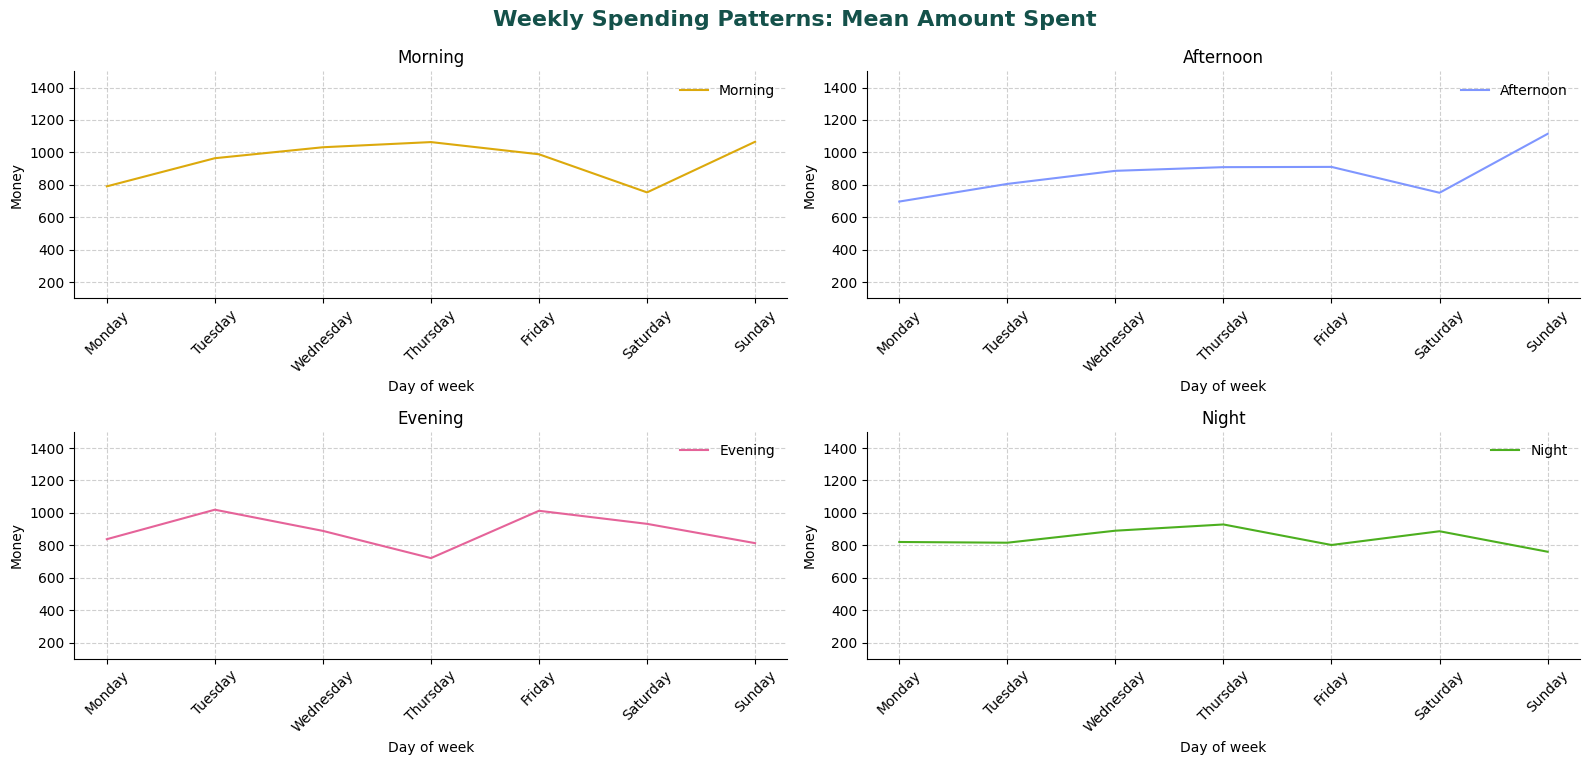

In [36]:
day_by_period_mean = df.groupby(['Order time period', 'Day of Week'], observed=False)['Total Customer Payment'].mean()

fig, ax = plt.subplots(2, 2, figsize=(16,8)) 

ax[0][0].plot(day_by_period_mean.loc['Morning'], c='#dca90c') 
ax[0][1].plot(day_by_period_mean.loc['Afternoon'], c='#7f96ff') 
ax[1][0].plot(day_by_period_mean.loc['Evening'], c='#e56399') 
ax[1][1].plot(day_by_period_mean.loc['Night'], c='#4caf1f') 

for axis in ax.ravel():
    axis.set_ylim(100,1500)
    # Подписи осей
    axis.set_xlabel('Day of week')
    axis.set_ylabel('Money')
    
    axis.spines[['right', 'top']].set_visible(False)
    axis.grid(True, linestyle='--', alpha=0.6)
    axis.tick_params(axis='x', rotation=45)

ax[0,0].legend(['Morning'], frameon=False)
ax[0,1].legend(['Afternoon'], frameon=False)
ax[1,0].legend(['Evening'], frameon=False)
ax[1,1].legend(['Night'], frameon=False)

ax[0][0].set_title('Morning')
ax[0][1].set_title('Afternoon')
ax[1][0].set_title('Evening')
ax[1][1].set_title('Night')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.suptitle('Weekly Spending Patterns: Mean Amount Spent', c='#14514A', fontsize=16, fontweight='bold')

# <span style="color:transparent;">4. Identifying Patterns in Data</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">4. Identifying Patterns in Data</h1>
</div>

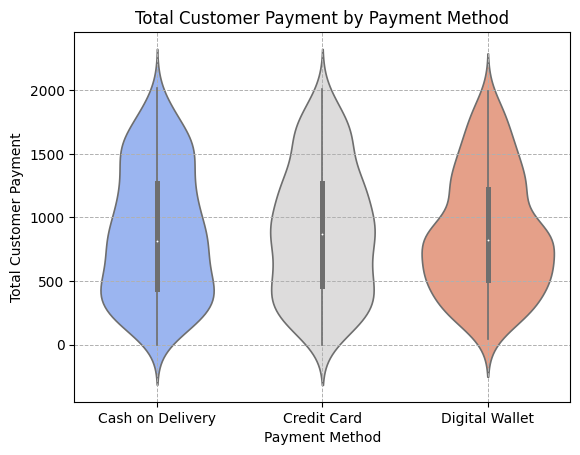

In [37]:
sns.violinplot(x=df['Payment Method'], y=df['Total Customer Payment'], 
        palette='coolwarm',
        linewidth=1.2       
)

plt.title('Total Customer Payment by Payment Method')
plt.xlabel('Payment Method')                          
plt.ylabel('Total Customer Payment')         
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Key Observations from the Violin Plot:</h3>
  <ul>
    <li><strong>Similar Payment Distributions:</strong>
      <br>The distribution of customer payments across all three payment methods (Cash on Delivery, Credit Card, and Digital Wallet) appears similar, with a comparable spread and median values.</li>
    <li><strong>Payment Range:</strong>
      <br>All payment methods show a broad range of customer payments, spanning from very low amounts to values over 2000. This indicates variability in the order values regardless of the payment method.</li>
    <li><strong>Density Patterns:</strong>
      <br>There is a higher density of customer payments in the lower to mid-range (around 500–1000) across all payment methods, suggesting that most transactions fall within this range.</li>
  </ul>
  <p>Overall, no significant differences are observed in the payment distributions among the three methods.</p>
</div>


In [38]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order ID,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Order Date and Time,1000,2024-01-20 11:03:07.648000,2024-01-01 02:12:47,2024-01-11 18:45:27.249999872,2024-01-20 11:38:43,2024-01-30 03:47:34.249999872,2024-02-07 23:56:12,NaN
Delivery Date and Time,1000,2024-01-20 12:16:42.148000256,2024-01-01 03:59:47,2024-01-11 19:54:57.249999872,2024-01-20 13:02:23,2024-01-30 05:09:34.249999872,2024-02-08 01:45:12,NaN
Order Value,1000.0,1053.969,104.0,597.75,1038.5,1494.0,1995.0,530.975339
Delivery Fee,1000.0,28.62,0.0,20.0,30.0,40.0,50.0,16.958278
Commission Fee,1000.0,126.99,50.0,90.0,127.0,164.0,200.0,43.06405
Payment Processing Fee,1000.0,29.832,10.0,20.0,30.0,40.0,50.0,11.627165
Refunds/Chargebacks,1000.0,28.3,0.0,0.0,0.0,50.0,150.0,49.614228
Delivery Duration,1000,0 days 01:13:34.500000,0 days 00:30:00,0 days 00:50:00,0 days 01:14:00,0 days 01:36:00,0 days 01:59:00,0 days 00:26:00.907999782
Delivery Duration (minutes),1000.0,73.575,30.0,50.0,74.0,96.0,119.0,26.015133


In [39]:
num_features = ['Normal Delivery Duration', 'Order Value', 'Delivery Fee', 'Discount Value', 'Total Customer Payment', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks', 'Delivery Duration (minutes)', 'Workday']
cat_features = ['Order time period', 'Payment Method', 'Day of Week']

In [40]:
correlation_matrix = df[num_features].corr()
correlation = correlation_matrix.loc[num_features, num_features]
correlation

,Normal Delivery Duration,Order Value,Delivery Fee,Discount Value,Total Customer Payment,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Delivery Duration (minutes),Workday
Normal Delivery Duration,1.000000,0.045458,0.009195,0.002594,0.044720,0.008569,0.043316,-0.035910,-0.834655,0.062265
Order Value,0.045458,1.000000,-0.003069,0.030266,0.895727,-0.072880,0.025589,-0.020607,-0.040435,-0.008914
Delivery Fee,0.009195,-0.003069,1.000000,0.012376,0.024586,0.012221,-0.036054,0.016720,0.001415,-0.047020
Discount Value,0.002594,0.030266,0.012376,1.000000,-0.359841,0.039869,-0.007119,0.004522,0.008770,0.036777
Total Customer Payment,0.044720,0.895727,0.024586,-0.359841,1.000000,-0.081383,0.023304,-0.131134,-0.044230,-0.019766
Commission Fee,0.008569,-0.072880,0.012221,0.039869,-0.081383,1.000000,-0.023755,-0.007738,-0.000441,-0.017881
Payment Processing Fee,0.043316,0.025589,-0.036054,-0.007119,0.023304,-0.023755,1.000000,-0.006152,0.016883,0.068440
Refunds/Chargebacks,-0.035910,-0.020607,0.016720,0.004522,-0.131134,-0.007738,-0.006152,1.000000,0.027126,-0.074660
Delivery Duration (minutes),-0.834655,-0.040435,0.001415,0.008770,-0.044230,-0.000441,0.016883,0.027126,1.000000,-0.050971
Workday,0.062265,-0.008914,-0.047020,0.036777,-0.019766,-0.017881,0.068440,-0.074660,-0.050971,1.000000


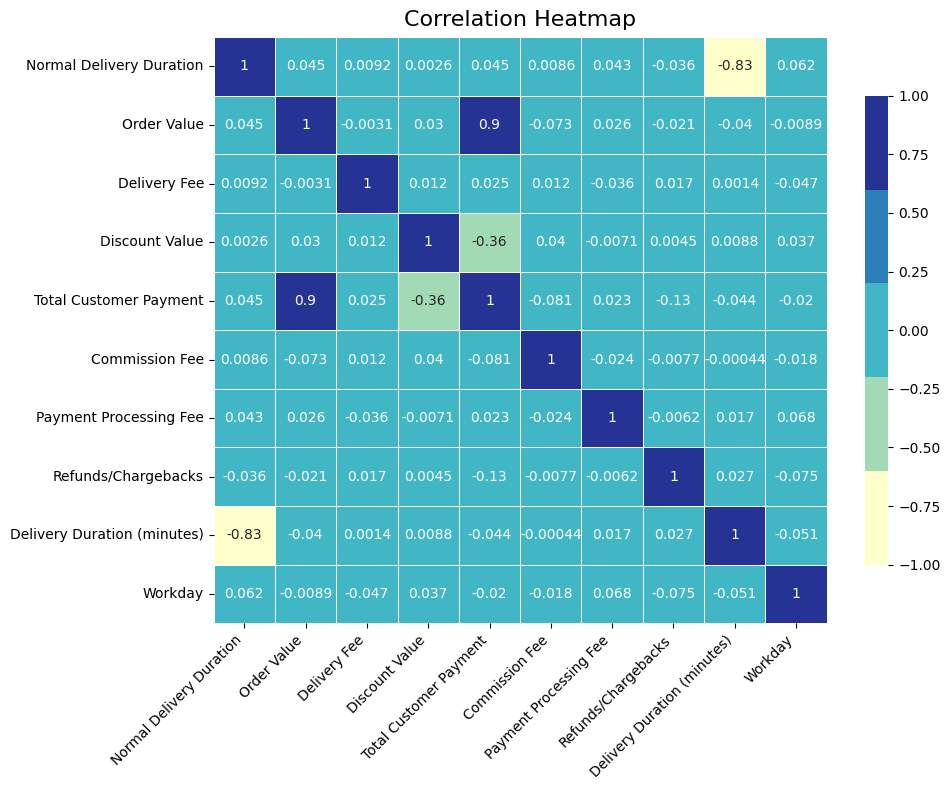

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
sns.heatmap(correlation, annot=True,
            linecolor='white', linewidth=0.5,
            annot_kws={'size':10}, 
            vmax=1, vmin=-1,
            cmap=colors, 
            cbar_kws={'shrink': 0.8}) 

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0) 

ax.set_title('Correlation Heatmap', fontsize=16, pad=8) 

plt.tight_layout()  

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Key Observations:</h3>
  <ul>
    <li><strong>Negative Correlation between Discount Value and Total Customer Payment (-0.359841):</strong>
      <br>There is a negative correlation between discounts and the total customer payment, meaning that as discounts increase, the total amount paid by the customer decreases. This could indicate that larger discounts are more common for higher-value orders or products.</li>
    <li><strong>Correlation between Delivery Duration (minutes) and Other Variables:</strong>
      <br>The correlation with other variables, such as <strong>Order Value</strong> (-0.040435) and <strong>Commission Fee</strong> (-0.000441), is weak. This suggests that the delivery duration does not significantly impact the order value or commission fees.</li>
    <li><strong>Minimal Correlation between Workday and Other Variables:</strong>
      <br>The negative correlation with <strong>Delivery Fee</strong> (-0.047020) and near-zero correlation with other variables suggests that the day of the week (whether it’s a workday or not) does not have a significant impact on delivery charges or other order-related metrics.</li>
  </ul>
</div>


In [42]:
def range_values(x):
    return x.max() - x.min()
    
df.pivot_table(index=df['Order Date and Time'].dt.day_name(), values=['Order Value', 'Total Customer Payment'], aggfunc=['mean', 'var', range_values])

mean                                   var  \
                     Order Value Total Customer Payment    Order Value   
Order Date and Time                                                      
Friday               1077.865079             914.087302  283372.805651   
Monday               1005.273973             800.123288  281062.586490   
Saturday             1027.566879             846.165605  283524.913768   
Sunday               1073.893443             907.950820  271217.534006   
Thursday             1066.481203             891.548872  293341.145477   
Tuesday              1054.534884             885.953488  297557.291174   
Wednesday            1082.104167             926.708333  266543.926136   

                                           range_values                         
                    Total Customer Payment  Order Value Total Customer Payment  
Order Date and Time                                                             
Friday                       255523.056317         1882                   1983  
Monday                       220448.439868         1874                   1832  
Saturday                     230476.651886         1877                   1891  
Sunday                       257171.468636         1866                   1928  
Thursday                     243803.037366         1841                   1883  
Tuesday                      256547.424725         1869                   1941  
Wednesday                    241825.970280         1874                   1937

In [43]:
pivot_table = df.pivot_table(
    index='Day of Week',
    values=['Order Value', 'Delivery Duration'],
    aggfunc='mean', observed=False
)

pivot_table['Delivery Duration'] = pivot_table['Delivery Duration'].dt.floor('s').astype(str).str.split().str[-1]

pivot_table['Order Value'] = pivot_table['Order Value'].round(2)

pivot_table

,Delivery Duration,Order Value
Day of Week,,
Monday,01:14:00,1005.27
Tuesday,01:09:43,1054.53
Wednesday,01:18:17,1082.10
Thursday,01:12:22,1066.48
Friday,01:14:24,1077.87
Saturday,01:16:32,1027.57
Sunday,01:09:33,1073.89


# <span style="color:transparent;">5. Impact of Discounts on Customer Retention</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">5. Impact of Discounts on Customer Retention</h1>
</div>

In [44]:
repeat_orders = df.groupby('Customer ID')['Order ID'].count().reset_index()

repeat_orders['Is_Repeated'] = repeat_orders['Order ID'] > 1

df = df.merge(repeat_orders[['Customer ID', 'Is_Repeated']], on='Customer ID', how='left')

In [45]:
df['Has_Discount'] = df['Discounts and Offers'].notna()

discount_repeat_rate = df.groupby('Has_Discount')['Is_Repeated'].mean()
discount_repeat_rate

Has_Discount
False    0.135135
True     0.096933
Name: Is_Repeated, dtype: float64

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Results:</h3>
  <ul>
    <li><strong>False (no discount):</strong> 13.5% of customers without discounts made repeat purchases.</li>
    <li><strong>True (with discount):</strong> 9.6% of customers with discounts made repeat purchases.</li>
  </ul>

  <h3 style="color: #4a90e2;">Conclusion:</h3>
  <p>
    Discounts do not seem to increase customer retention. Customers using discounts are less likely to return compared to those who did not use them. This suggests that discounts may attract one-time buyers or that service quality does not encourage repeat purchases.
  </p>
</div>


In [46]:
group_counts = df.groupby('Has_Discount')['Customer ID'].nunique()
print(group_counts)

Has_Discount
False    182
True     785
Name: Customer ID, dtype: int64


<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <p>
    The analysis highlights that while discounts successfully attract a large number of customers, they do not necessarily drive repeat purchases. This indicates that while discounts are effective for customer acquisition, there is a need to shift focus towards retention strategies. Additionally, the comparison of order value differences, discount types, and customer behavior offers valuable insights for optimizing pricing strategies and developing more effective loyalty programs.
  </p>

  <h3 style="color: #4a90e2;">Key Recommendations:</h3>
  <ul>
    <li><strong>Enhance retention strategies:</strong> Convert one-time discount users into loyal customers.</li>
    <li><strong>Leverage loyalty programs:</strong> Reward repeat customers and incentivize higher spending.</li>
  </ul>
</div>


# <span style="color:transparent;">6. Commission Fee Optimization</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">6. Commission Fee Optimization</h1>
</div>

In [47]:
restaurant_analysis = df.groupby('Restaurant ID').agg(
    avg_commission=('Commission Fee', 'mean'),
    avg_order_value=('Order Value', 'mean'),
    total_orders=('Order ID', 'count')
).sort_values(by='avg_commission', ascending=False)

restaurant_analysis.head(10) 

,avg_commission,avg_order_value,total_orders
Restaurant ID,,,
R2199,200.0,149.0,1
R2470,200.0,213.0,1
R2952,199.0,228.0,1
R2356,198.0,1402.0,1
R2543,198.0,990.0,1
R2569,197.5,1174.5,2
R2898,197.0,1786.0,1
R2614,197.0,1765.0,1
R2144,196.5,1581.5,2


In [48]:
restaurant_analysis['avg_profit'] = restaurant_analysis['avg_order_value'] - restaurant_analysis['avg_commission']

high_commission_low_profit = restaurant_analysis[
    (restaurant_analysis['avg_commission'] > restaurant_analysis['avg_commission'].mean()) &
    (restaurant_analysis['avg_profit'] < restaurant_analysis['avg_profit'].mean())
]

high_commission_low_profit_sorted = high_commission_low_profit.sort_values(by=['avg_profit', 'avg_commission'])

high_commission_low_profit_sorted

,avg_commission,avg_order_value,total_orders,avg_profit
Restaurant ID,,,,
R2199,200.0,149.0,1,-51.0
R2319,172.0,129.0,1,-43.0
R2732,185.0,143.0,1,-42.0
R2736,143.0,105.0,1,-38.0
R2631,153.0,118.0,1,-35.0
...,...,...,...,...
R2232,172.0,1079.0,2,907.0
R2257,137.0,1045.0,1,908.0
R2379,169.5,1091.0,2,921.5


<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Summary:</h3>
  <p>
    Some restaurants show negative profitability due to high commission fees relative to their order values. For example, Restaurant R2199 has a commission of 200 with an order value of 149, resulting in a loss of -51. However, a few restaurants achieve positive profit, suggesting that order value or commission structure plays a significant role.
  </p>

  <h3 style="color: #4a90e2;">Recommendations:</h3>
  <ul>
    <li><strong>Review Commission Structures:</strong> Consider renegotiating commissions for low-profit restaurants.</li>
    <li><strong>Identify Best Practices:</strong> Analyze profitable restaurants to understand what contributes to their success.</li>
    <li><strong>Expand Analysis:</strong> Evaluate more data to confirm trends, as the current sample includes only one order per restaurant.</li>
  </ul>
</div>


# <span style="color:transparent;">7. Payment Methods Analysis</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-0shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">7. Payment Methods Analysis</h1>
</div>

In [49]:
payment_fee_analysis = df.groupby('Payment Method')['Payment Processing Fee'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

payment_fee_analysis.columns = ['avg_processing_fee', 'total_transactions']

payment_fee_analysis

,avg_processing_fee,total_transactions
Payment Method,,
Cash on Delivery,29.983193,357
Credit Card,29.887240,337
Digital Wallet,29.594771,306


In [50]:
df.groupby(['Order time period', 'Payment Method'], observed=True)['Order Value'].agg(['mean', 'median']).round(2)

mean  median
Order time period Payment Method                   
Morning           Cash on Delivery  1181.67  1187.0
                  Credit Card       1117.06  1101.0
                  Digital Wallet    1090.84  1115.0
Afternoon         Cash on Delivery  1063.85  1035.0
                  Credit Card       1004.00  1012.0
                  Digital Wallet    1069.07  1041.0
Evening           Cash on Delivery   966.67   970.0
                  Credit Card       1121.32  1167.5
                  Digital Wallet    1040.88   994.0
Night             Cash on Delivery  1025.10  1009.0
                  Credit Card       1040.52  1058.0
                  Digital Wallet     989.63   924.0

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <p><strong>1. Similar Fees for All Methods:</strong><br>
  The processing fees for cash, credit cards, and digital wallets are nearly identical. The small differences have no significant impact on overall profitability.</p>

  <p><strong>2. No Clear Advantage:</strong><br>
  There’s no substantial benefit to promoting one payment method over another based solely on processing fees.</p>

  <h3 style="color: #4a90e2;">Recommendations:</h3>
  <ul>
    <li><strong>Focus on Other Factors:</strong> Consider customer convenience or processing speed rather than fee differences.</li>
    <li><strong>Further Analysis:</strong> Examine potential differences in refund processing or payment delays across methods.</li>
  </ul>
</div>


# <span style="color:transparent;">8. Limitations and Future Work</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #faebd7; text-align: center; box-0shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #3572d4; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">8. Limitations and Future Work</h1>
</div>

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <h3 style="color: #4a90e2;">Limitations:</h3>
  <ul>
    <li><strong>Limited Data Size:</strong> The analysis is based on only 1,000 records, which may restrict the insights and conclusions.</li>
    <li><strong>Lack of External Factors:</strong> The analysis does not consider external factors like seasonality or marketing campaigns, which may significantly influence customer behavior.</li>
    <li><strong>Missed Key Metrics:</strong> Information about other potential factors, such as service quality or customer satisfaction, is not included in the analysis.</li>
  </ul>

  <h3 style="color: #4a90e2;">Future Work:</h3>
  <ul>
    <li><strong>Increase Data Volume:</strong> Adding more data will enhance the accuracy of insights and increase the robustness of the models.</li>
    <li><strong>Use External Data:</strong> Including external data (e.g., weather conditions, promotional campaigns) will improve the ability to assess the impact of discounts and orders on profitability.</li>
    <li><strong>Long-Term Analysis:</strong> Applying the analysis to a longer time frame will help identify long-term patterns and adjust strategies accordingly.</li>
    <li><strong>Include Service Quality Data:</strong> Collecting data on service quality and customer satisfaction will help assess how these factors influence repeat purchases and profitability.</li>
  </ul>
</div>

<div style="background-color: #f0f8ff; border-left: 5px solid #4a90e2; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
  <p style="font-size: 16px; color: #333;">
    Thank you for reviewing this EDA. If you found the insights useful, I would appreciate your upvote👍 and feedback. Your support helps me improve and create better analyses!💡
  </p>
</div>